In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"E:\Startup\Dataset\thorasis\ThoraricSurgery_orig1.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 18 columns):
id         470 non-null int64
DGN        470 non-null object
PRE4       470 non-null float64
PRE5       470 non-null float64
PRE6       470 non-null object
PRE7       470 non-null object
PRE8       470 non-null object
PRE9       470 non-null object
PRE10      470 non-null object
PRE11      470 non-null object
PRE14      470 non-null object
PRE17      470 non-null object
PRE19      470 non-null object
PRE25      470 non-null object
PRE30      470 non-null object
PRE32      470 non-null object
AGE        470 non-null int64
Risk1Yr    470 non-null object
dtypes: float64(2), int64(2), object(14)
memory usage: 66.2+ KB


In [3]:
df.head()

,id,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,1,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,2,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,3,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,4,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,5,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T


In [4]:
df[['PRE7', 'PRE8', 'PRE9', 'PRE10', 'PRE11', 'PRE17', 'PRE19', 'PRE25', 'PRE30', 'PRE32', 'Risk1Yr']] = \
(df[['PRE7', 'PRE8', 'PRE9', 'PRE10', 'PRE11', 'PRE17', 'PRE19', 'PRE25', 'PRE30', 'PRE32', 'Risk1Yr']] == 'T').astype(int)

In [5]:
df['DGN'] = df.DGN.str[-1:].astype(int)
df['PRE6'] = df.PRE6.str[-1:].astype(int)
df['PRE14'] = df.PRE14.str[-1:].astype(int)

In [6]:
df = df.drop(['id'], axis=1)
df.head()

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,2,2.88,2.16,1,0,0,0,1,1,4,0,0,0,1,0,60,0
1,3,3.40,1.88,0,0,0,0,0,0,2,0,0,0,1,0,51,0
2,3,2.76,2.08,1,0,0,0,1,0,1,0,0,0,1,0,59,0
3,3,3.68,3.04,0,0,0,0,0,0,1,0,0,0,0,0,54,0
4,3,2.44,0.96,2,0,1,0,1,1,1,0,0,0,1,0,73,1


In [7]:
col_names = {'DGN': 'Diagnosis', 'PRE4': 'FVC', 'PRE5': 'FEV1', 'PRE6': 'Performance', \
            'PRE7': 'Pain', 'PRE8': 'Haemoptysis', 'PRE9': 'Dyspnoea', 'PRE10': 'Cough', \
            'PRE11': 'Weakness', 'PRE14': 'Tumor_Size', 'PRE17': 'Diabetes_Mellitus', \
            'PRE19': 'MI_6mo', 'PRE25': 'PAD', 'PRE30': 'Smoking', 'PRE32': 'Asthma', \
            'AGE': 'Age', 'Risk1Yr': 'Death_1yr'}
df = df.rename(index=str, columns=col_names)

In [8]:
df.head()

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr
0,2,2.88,2.16,1,0,0,0,1,1,4,0,0,0,1,0,60,0
1,3,3.40,1.88,0,0,0,0,0,0,2,0,0,0,1,0,51,0
2,3,2.76,2.08,1,0,0,0,1,0,1,0,0,0,1,0,59,0
3,3,3.68,3.04,0,0,0,0,0,0,1,0,0,0,0,0,54,0
4,3,2.44,0.96,2,0,1,0,1,1,1,0,0,0,1,0,73,1


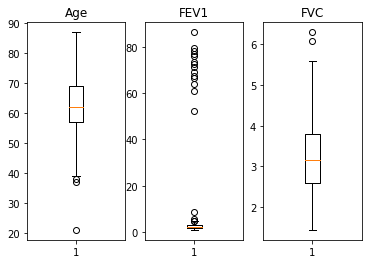

In [9]:
fig, axs = plt.subplots(1,3)
axs[0].boxplot(df.Age)
axs[0].set_title('Age')
axs[1].boxplot(df.FEV1)
axs[1].set_title('FEV1')
axs[2].boxplot(df.FVC)
axs[2].set_title("FVC")
plt.show()

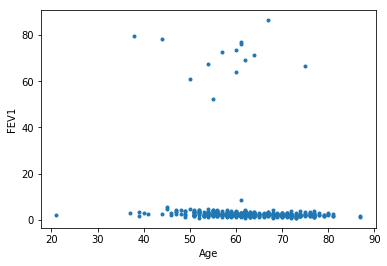

In [10]:
plt.plot(df.Age, df.FEV1, linestyle='none', marker='.')
plt.xlabel('Age')
plt.ylabel('FEV1')
plt.show()

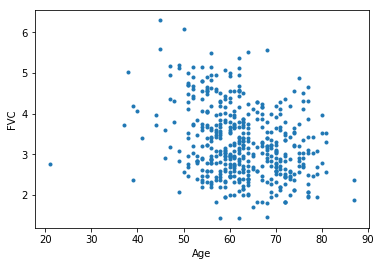

In [11]:
plt.plot(df.Age, df.FVC, linestyle='none', marker='.')
plt.xlabel('Age')
plt.ylabel('FVC')
plt.show()

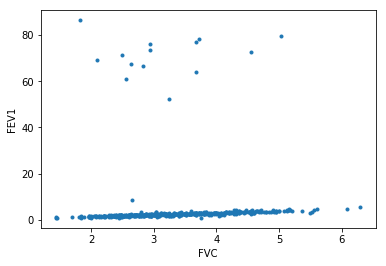

In [12]:
plt.plot(df.FVC, df.FEV1, linestyle='none', marker='.')
plt.xlabel('FVC')
plt.ylabel('FEV1')
plt.show()

In [1]:
df = df[df.Age > 30]
df = df[df.FEV1 < 8]
if (df(Age<30)):
    df(Age.replace([np.NaN]))

NameError: name 'df' is not defined

In [14]:
len(df)

454

In [15]:
df.to_csv('ThoracicSurgery.csv', encoding='utf-8', index=False)

In [16]:
dataset=pd.read_csv("ThoracicSurgery.csv")
dataset.isnull().any()

Diagnosis            False
FVC                  False
FEV1                 False
Performance          False
Pain                 False
Haemoptysis          False
Dyspnoea             False
Cough                False
Weakness             False
Tumor_Size           False
Diabetes_Mellitus    False
MI_6mo               False
PAD                  False
Smoking              False
Asthma               False
Age                  False
Death_1yr            False
dtype: bool

In [17]:
#from sklearn.preprocessing import LabelEncoder
#le =LabelEncoder()
#dataset['Dignoisis'] = le.fit_transform(dataset['Dignoisis'] )
#dataset['Performance'] = le.fit_transform(dataset['Performance'] )
#dataset['Pain'] = le.fit_transform(dataset['Pain'] )
#dataset['Haemoptysis'] = le.fit_transform(dataset['Haemoptysis'] )
#dataset['Dyspnoea'] = le.fit_transform(dataset['Dyspnoea'] )
#dataset['Cough'] = le.fit_transform(dataset['Cough'] )
#dataset['Weakness'] = le.fit_transform(dataset['Weakness'] )
#dataset['Tumor_size'] = le.fit_transform(dataset['Tumor_size'] )
#dataset['Diabetes'] = le.fit_transform(dataset['Diabetes'] )
#dataset['MI_6mo'] = le.fit_transform(dataset['MI_6mo'] )
#dataset['PAD'] = le.fit_transform(dataset['PAD'] )
#dataset['Smoking'] = le.fit_transform(dataset['Smoking'] )
#dataset['Asthma'] = le.fit_transform(dataset['Asthma'] )
#dataset['Risk1Yr'] = le.fit_transform(dataset['Risk1Yr'] )

In [18]:
dataset.head()

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr
0,2,2.88,2.16,1,0,0,0,1,1,4,0,0,0,1,0,60,0
1,3,3.40,1.88,0,0,0,0,0,0,2,0,0,0,1,0,51,0
2,3,2.76,2.08,1,0,0,0,1,0,1,0,0,0,1,0,59,0
3,3,3.68,3.04,0,0,0,0,0,0,1,0,0,0,0,0,54,0
4,3,2.44,0.96,2,0,1,0,1,1,1,0,0,0,1,0,73,1


In [19]:
import seaborn as sns
#sns.pairplot(dataset)

In [20]:
dataset.corr()

,Diagnosis,FVC,FEV1,Performance,Pain,Haemoptysis,Dyspnoea,Cough,Weakness,Tumor_Size,Diabetes_Mellitus,MI_6mo,PAD,Smoking,Asthma,Age,Death_1yr
Diagnosis,1.000000,0.106642,0.100170,-0.042919,0.006541,-0.078367,-0.031233,-0.081930,-0.018096,-0.134280,0.033409,-0.008606,-0.017328,-0.096235,-0.008606,0.090274,0.073938
FVC,0.106642,1.000000,0.887545,-0.102612,0.001981,-0.103742,0.070158,-0.066180,-0.105544,0.037635,-0.120430,-0.009767,-0.037149,-0.012865,-0.062058,-0.299430,-0.045123
FEV1,0.100170,0.887545,1.000000,-0.138419,0.012140,-0.158771,0.024530,-0.134925,-0.128324,0.014588,-0.111169,-0.034237,-0.032890,-0.054192,-0.079098,-0.309617,-0.073388
Performance,-0.042919,-0.102612,-0.138419,1.000000,0.132116,0.129292,0.093149,0.692147,0.417734,0.101060,0.030971,0.025667,0.020144,0.176232,-0.036983,0.200226,0.094011
Pain,0.006541,0.001981,0.012140,0.132116,1.000000,0.225459,0.061782,-0.056551,-0.065151,0.094831,0.034604,-0.016727,-0.033678,-0.082988,-0.016727,0.057386,0.075141
Haemoptysis,-0.078367,-0.103742,-0.158771,0.129292,0.225459,1.000000,0.100836,0.067577,0.073938,0.050140,0.008696,-0.026454,0.092996,-0.022923,-0.026454,0.083440,0.081781
Dyspnoea,-0.031233,0.070158,0.024530,0.093149,0.061782,0.100836,1.000000,0.075556,-0.058753,0.077375,-0.031999,-0.016058,0.114452,-0.043642,-0.016058,0.001787,0.112979
Cough,-0.081930,-0.066180,-0.134925,0.692147,-0.056551,0.067577,0.075556,1.000000,0.199428,0.150563,0.024284,0.043958,0.015713,0.194116,-0.028350,0.131230,0.093019
Weakness,-0.018096,-0.105544,-0.128324,0.417734,-0.065151,0.073938,-0.058753,0.199428,1.000000,-0.034797,0.070072,0.057875,0.027763,0.114566,-0.030297,0.205717,0.083691
Tumor_Size,-0.134280,0.037635,0.014588,0.101060,0.094831,0.050140,0.077375,0.150563,-0.034797,1.000000,0.036253,-0.021976,-0.020558,0.043060,-0.021976,0.010370,0.168335


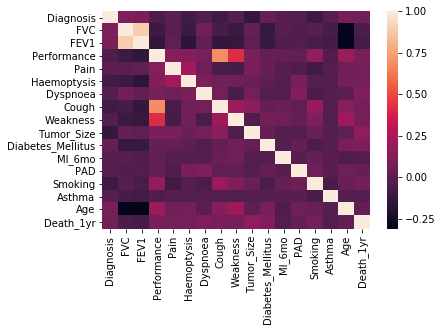

In [21]:
sns.heatmap(dataset.corr())

In [22]:
x=dataset.iloc[:,0:16].values
y=dataset.iloc[:,16].values

In [23]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x=sc.fit_transform(x)

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [25]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test) 
from sklearn.linear_model import LogisticRegression
logr=LogisticRegression()
logr.fit(x_train,y_train)
y_pred=logr.predict(x_test)
import sklearn.metrics as metrics
fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred)
roc_auc_LR=metrics.auc(fpr,tpr)
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8131868131868132

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,p=2)
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)
fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred)
roc_auc_knn=metrics.auc(fpr,tpr)
accuracy_score(y_test,y_pred_knn)

0.8131868131868132

In [27]:
from sklearn.svm import SVC
model=SVC(kernel='rbf')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred)
roc_auc_nlsvc=metrics.auc(fpr,tpr)
accuracy_score(y_test,y_pred)

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8131868131868132

In [28]:
lsvm=SVC(kernel='linear')
lsvm.fit(x_train,y_train)
y_pred=lsvm.predict(x_test)
fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred)
roc_auc_lscv=metrics.auc(fpr,tpr)
accuracy_score(y_pred,y_test)

0.8131868131868132

In [29]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
y_pred=nb.predict(x_test)
fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred)
roc_auc_nb=metrics.auc(fpr,tpr)
accuracy_score(y_pred,y_test)

0.1978021978021978

In [30]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy',splitter='best')
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred)
roc_auc_dt=metrics.auc(fpr,tpr)
accuracy_score(y_pred,y_test)

0.7912087912087912

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=6,criterion='entropy')
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred)
roc_auc_rf=metrics.auc(fpr,tpr)
accuracy_score(y_pred,y_test)

0.7912087912087912

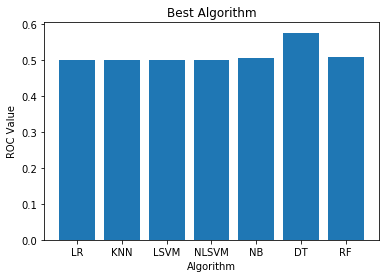

In [32]:
roclist=[roc_auc_LR,roc_auc_knn,roc_auc_lscv,roc_auc_nlsvc,roc_auc_nb,roc_auc_dt,roc_auc_rf]
name=["LR","KNN","LSVM","NLSVM","NB","DT","RF"]
plt.bar(name,roclist)
plt.title("Best Algorithm")
plt.xlabel("Algorithm") 
plt.ylabel("ROC Value") 
plt.show()

In [33]:
y_test

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [34]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [37]:
dt.predict([[3,3.40,1.88,0,0,0,0,0,0,2,0,0,0,1,0,51]])

array([1], dtype=int64)